In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
import imghdr

dir = "dataset/training"

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for class_name in os.listdir(dir):  
    class_path = os.path.join(dir, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        if imghdr.what(img_path) not in ['jpeg', 'png', 'jpg']:  # Verifica se é uma imagem
            print(f"Arquivo não suportado ou corrompido: {img_name}")
            continue
    
        try:
            img = load_img(img_path)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            
            count = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=class_path, save_prefix=f"aug_{img_name.split('.')[0]}", save_format="jpg"):
                count += 1
                if count >= 1: 
                    break
        except Exception as e:
            print(f"Erro ao carregar {img_name}: {e}")
            continue

C:\Users\Bernardo Duarte\AppData\Local\Temp\ipykernel_4608\1027639355.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Arquivo não suportado ou corrompido: _DS_Store
Arquivo não suportado ou corrompido: _DS_Store


In [67]:

train_data, valid_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/training',
    validation_split=0.15,  
    subset="both",     
    seed=42,               
    image_size=(128, 128),
    shuffle=True, 
    batch_size=32          
)


Found 14580 files belonging to 2 classes.
Using 12393 files for training.
Using 2187 files for validation.


In [4]:

'''valid_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/training',
    validation_split=0.15,  
    subset="validation",   
    seed=42,               
    image_size=(128, 128), 
    batch_size=32          
)'''


Found 14580 files belonging to 2 classes.
Using 1458 files for validation.


In [68]:
def normalizer(image, label):
    aux = tf.cast(image, dtype=tf.float32)
    image_norm = aux/255.0
    return image_norm, label

train = train_data.map(normalizer) 
valid = valid_data.map(normalizer) 
    

In [69]:
test_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/test',                 
    image_size=(128, 128), 
    batch_size=32          
)

test = test_data.map(normalizer)

Found 2023 files belonging to 2 classes.


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

c:\Users\Bernardo Duarte\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
#model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'],
)

In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,109,953 (19.49 MB)

 Trainable params: 5,108,993 (19.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [73]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience=2,
    factor=0.5,
    min_lr = 0.00001,
    verbose = 1
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose= 0)

In [74]:
hist = model.fit(
    train,
    validation_data=valid, 
    epochs=30,  
    batch_size=32,
    shuffle=True,
    callbacks=[early_stopping,learning_rate_reduction],
    verbose = 1
)



Epoch 1/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 108s 268ms/step - accuracy: 0.5751 - loss: 1.4634 - val_accuracy: 0.5249 - val_loss: 0.8211 - learning_rate: 0.0010
Epoch 2/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 103s 265ms/step - accuracy: 0.6569 - loss: 0.6214 - val_accuracy: 0.6872 - val_loss: 0.5765 - learning_rate: 0.0010
Epoch 3/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 103s 265ms/step - accuracy: 0.6896 - loss: 0.5831 - val_accuracy: 0.7160 - val_loss: 0.5771 - learning_rate: 0.0010
Epoch 4/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 103s 266ms/step - accuracy: 0.7294 - loss: 0.5425 - val_accuracy: 0.6731 - val_loss: 0.6468 - learning_rate: 0.0010
Epoch 5/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 103s 265ms/step - accuracy: 0.7674 - loss: 0.4869 - val_accuracy: 0.7481 - val_loss: 0.5174 - learning_rate: 0.0010
Epoch 6/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 104s 268ms/step - accuracy: 0.7956 - loss: 0.4413 - val_accuracy: 0.7458 - val_loss: 0.5291 - learning_rate: 0.0010
Epoch 7/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 108s 277ms/step - accura

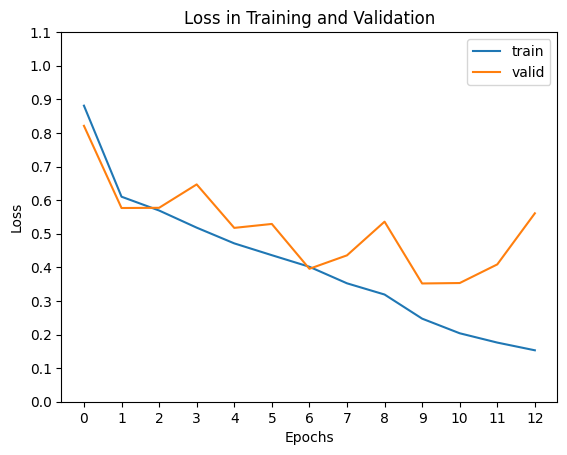

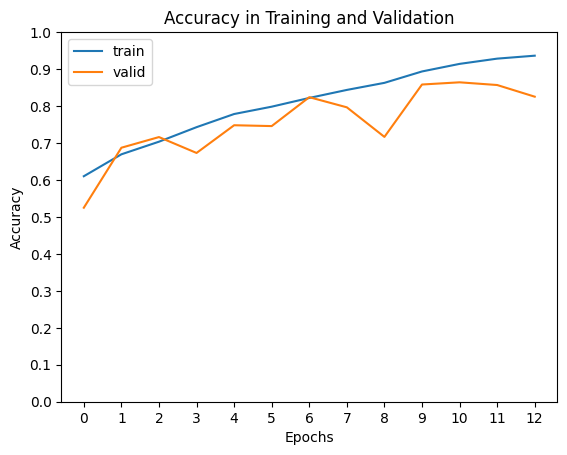

In [75]:
import matplotlib.pyplot as plt


plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='valid')
plt.xticks(np.arange(0, 13, 1))
plt.yticks(np.arange(0, 1.2, 0.1))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss in Training and Validation')
plt.show()


if 'accuracy' in hist.history: 
    plt.plot(hist.history['accuracy'], label='train')
    plt.plot(hist.history['val_accuracy'], label='valid')
    plt.xticks(np.arange(0, 13, 1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy in Training and Validation')
    plt.show()

In [76]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models', 'normalizado.h5'))

new_model = load_model(os.path.join('models', 'normalizado.h5'))

In [78]:
loss, acc = new_model.evaluate(test, batch_size=32)

print(loss)
print(acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9007 - loss: 0.2650
0.3182167112827301
0.8887790441513062


In [87]:
#result = new_model.predict(test, batch_size = 32, verbose = 0)

X, y_true = [], []

for images, labels in test:
    X.append(images.numpy())  # Convertendo para array NumPy
    y_true.append(labels.numpy())

# Convertendo listas para arrays
X = np.concatenate(X, axis=0)
y_true = np.concatenate(y_true, axis=0)

y_pred = new_model.predict(X)

#y_pred = (result > 0.5).astype(int).flatten()

#y_true = np.concatenate([y for x, y in test], axis=0)

64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step


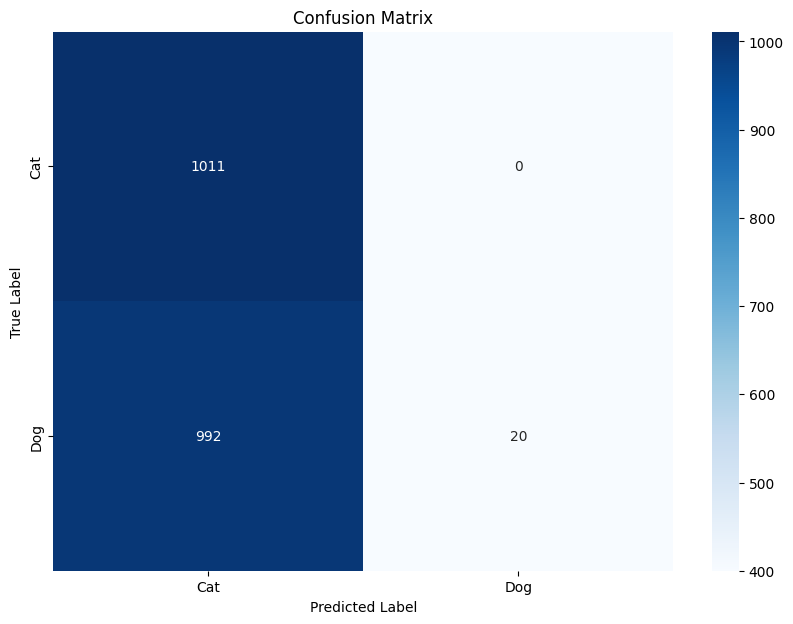

In [88]:
import seaborn as sns

matrix = tf.math.confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(
    matrix.numpy(), 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=['Cat', 'Dog'], 
    yticklabels=['Cat', 'Dog'],
    vmin = 400
)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()